# MNIST handwritten digits classification with MLPs, by hand

Author: Tanwi Mallick adapting notebooks by Bethany Lusch, Prasanna Balaprakash and Taylor Childers

In this notebook, we'll train a multi-layer perceptron model (multi-layer neural network) to classify MNIST digits. We'll build up the code by hand. In the next notebook, we show how this can be done using existing libraries.

First, the needed imports.

In [92]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt

## MNIST data set

Next we'll load the MNIST handwritten digits data set. First time we may have to download the data, which can take a while.

<img src="images/MnistExamples.png"  align="left"/>

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

print(x_train.shape)

(60000, 28, 28)


The training data (x_train) is a matrix of size (60000, 28*28), i.e. it consists of 60000 images that were each of size 28x28 pixels but are now flattened into vectors. y_train is a 60000-dimensional vector containing the correct classes ("0", "1", ..., "9") for each training sample.

In [7]:
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

(60000, 784)

MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 784)
y_train: (60000,)


Let's take a closer look. Here are the first 10 training digits:

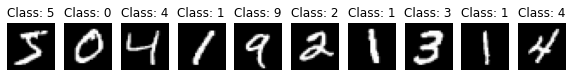

In [3]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(numpy.reshape(x_train[i,:], (28, 28)), cmap="gray")
    plt.title('Class: '+str(y_train[i]))

## Linear model

Let's begin with a simple linear model: linear regression, like in the previous module. 
We add these extras:
- Each example is a vector (flattened image), so the "slope" multiplication becomes a dot product.
- We consider multiple examples at once. input_images is a matrix where each row is an example.

In [72]:
def linear_model(W, input_images):
    # f(x) = xW returns m-length vector, where m is the number of examples
    return numpy.dot(input_images, W)

$\large{MSE = \frac{1}{n} \sum_{i=1}^{n} (y - \hat{y})^{2}}$ 

In [73]:
def evaluate(W, input_images, true_labels):
    predicted_label = linear_model(W, input_images)
    MSE = numpy.mean((true_labels - predicted_label)**2) 
    return MSE

Update weights using gradient decent 
$\large{W = W - \eta \frac{\partial J(W)}{\partial W} }$,  where, $W$ is the network weight, $\eta$ is the learning rate and $J(W)$ is the objective function

In [77]:
def learn(input_images, true_labels, current_W, learning_rate=0.000001):
    # first we need dJW/dW where JW = MSE 
    n = input_images.shape[0] # get number of examples to average over
    label_predictions = linear_model(current_W, input_images)
    # calculate gradient: one entry per partial derivative for an entry in vector W
    dJW_dW = (2./n) * numpy.dot(input_images.transpose(), label_predictions - true_labels)
    # now we update W
    new_W = current_W - (learning_rate * dJW_dW)  # gradient update step
    return new_W

In practice, we usually don't use all of the training data to calculate each step. We use a random subset. This makes the steps faster and noisier. 

In [75]:
# At the moment we take the simple route and use a fixed subset. 
batch_size = 100

x_train_batch = x_train[:batch_size, :]
y_train_batch = y_train[:batch_size,numpy.newaxis]

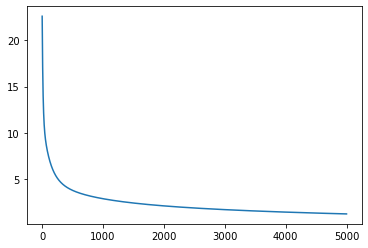

In [80]:
num_features = x_train.shape[1]
W = .01 * numpy.random.rand(num_features,1)
learning_rate = 0.0005  

num_iters = 5000
losses = numpy.zeros(num_iters,)

for i in range(0, num_iters):
    # all the magic here
    W = learn(x_train_batch, y_train_batch, W, learning_rate)
    losses[i] = evaluate(W, x_train_batch, y_train_batch)
plt.plot(losses)

### Check results so far

As expected, this simple linear model f(x) = xW is not very accurate

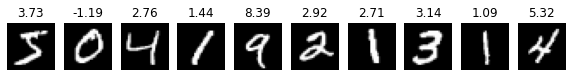

In [81]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))
predicted_labels = linear_model(W, x_train[:10,:])

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(numpy.reshape(x_train[i,:], (28, 28)), cmap="gray")
    plt.title('%1.2f' % predicted_labels[i])

### Improving the model

Examples of basic ways to improve:
- Add bias term: f(x) = xW + b
- Reformulate as classification (output integers, not real numbers), like logistic regression
- Minimize something other than mean squared error

In [86]:
def sigmoid(x):
    z = 1/(1 + numpy.exp(-x))
    return(z)

def classification_model(A, b, input_images):
    # f(x) = sigmoid(xA + b) returns m-length vector, where m is the number of examples
    return sigmoid(numpy.dot(input_images, W) + b)

The sigmoid function encourages outputs of 0 and 1

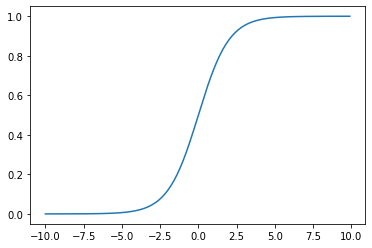

In [87]:
x = numpy.arange(-10, 10, step=.1)
plt.plot(x, sigmoid(x))

To handle multiple classes, it's common to use a one-hot encoding:

In [88]:
# one-hot encoding:
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

Training sample 0 : class: 5 , one-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Training sample 1 : class: 0 , one-hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 2 : class: 4 , one-hot encoded: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Training sample 3 : class: 1 , one-hot encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 4 : class: 9 , one-hot encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Training sample 5 : class: 2 , one-hot encoded: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Training sample 6 : class: 1 , one-hot encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 7 : class: 3 , one-hot encoded: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Training sample 8 : class: 1 , one-hot encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 9 : class: 4 , one-hot encoded: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


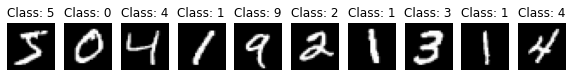

In [89]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(numpy.reshape(x_train[i,:], (28, 28)), cmap="gray")
    plt.title('Class: '+str(y_train[i]))
    print('Training sample',i,': class:',y_train[i], ', one-hot encoded:', y_train_onehot[i])

To hand multi-class classification, it's common to use softmax instead of sigmoid. It's related but forces the outputs to sum to 1, like a probability distribution.

Also, for multi-class classification problem, it is common to minimize a different "loss" function instead of mean squared error, like categorical cross-entropy. You can read more [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/). 

## Nonlinear Model

The above improvements are not enough to classify these images. We move to a nonlinear model. 

A neural network has multiple layers. A basic layer is $\sigma(xA + b)$. An example neural network with two layers adds another affine transformation:

$f(x) = \sigma(\sigma(xW_1 + b_1)W_2 + b_2)$

This is often drawn as a network like this:


<img src="images/tiny_network.png" width="300" hight="300" align="left"/>

Writing it in numpy:

In [93]:
def nonlinear_model(W1, W2, b1, b2, input_images):
    return sigmoid(numpy.dot(sigmoid(numpy.dot(input_images, W1) + b1), W2) + b2)

Adding another layer:

$f(x) = \sigma(\sigma(\sigma(xW_1 + b_1)W_2 + b_2)W_3 + b_3)$


<img src="images/three_layer_network.png" width="300" hight="300" align="left"/>

In [94]:
def nonlinear_model(A1, A2, A3, b1, b2, b3, input_images):
    return sigmoid(numpy.dot(sigmoid(numpy.dot(sigmoid(numpy.dot(input_images, A1) + b1), A2) + b2), A3) + b3)

On the other hand, deep learning training can be tricky. 

Unlike linear regression, the objective function that you're minimizing (some measure of error) is non-convex, so there can be many local optima. 

![multiple local minima](images/nonconvex.png)

Image source: [firsttimeprogrammer.blogspot.com](http://firsttimeprogrammer.blogspot.com/2014/09/multivariable-gradient-descent.html)

1. The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.
    - $\large{W = W - \eta \frac{\partial J(W)}{\partial W} }$

    - A high learning rate can overshoot, causing the system to become unstable and diverge.
    - A low learning rate converges slowly and becomes stuck in false local minima.

Image source: [saugatbhattarai](https://saugatbhattarai.com.np/what-is-gradient-descent-in-machine-learning/learning-rate-gradient-descent/)
<img src="images/learning-rate-gradient-descent.jpeg" width="500" hight="500" align="left"/>

Gradient descent optimization algorithms 
- SGD
- Adam 
- RMSprop
- Adadelta
- Adagrad

Image source: [Sebastian Ruder](https://ruder.io/optimizing-gradient-descent/)

2. Neural networks can be overly flexible/complicated and "overfit" your data. This is like what happens if you fit a high-degree polynomial:


<img src="images/bias_vs_variance.png" width="800" hight="500" align="left"/>

3. To improve the generalization of our model on previously unseen data, we employ a technique known as regularization, which constrains our optimization problem in order to discourage complex models. Dropout is the commonly used regularization technique

    - The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

<img src="images/dropout.png" width="600" hight="600" align="left"/>


Image source: [Amine ben khalifa](https://www.researchgate.net/figure/Dropout-neural-network-model-a-is-a-standard-neural-network-b-is-the-same-network_fig3_309206911)


<img src="images/test_data_rule.png" width="800" hight="500" align="left"/>

Now that we have the basics, we can experiment with more complicated networks. Rather than implement these all by hand, we will move to using existing Python packages in the next notebook. To continue by hand, check out [this blog post](https://towardsdatascience.com/coding-a-2-layer-neural-network-from-scratch-in-python-4dd022d19fd2).